In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a Base using 'automap_base()'
Base = automap_base()
# Use the Base class to reflect the data tables
Base.prepare(autoload_with=engine)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
# Assign the mearsuemet class to a ceriable called 'Measurement' and 
# the station class to a veriable called 'Station'
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session 
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

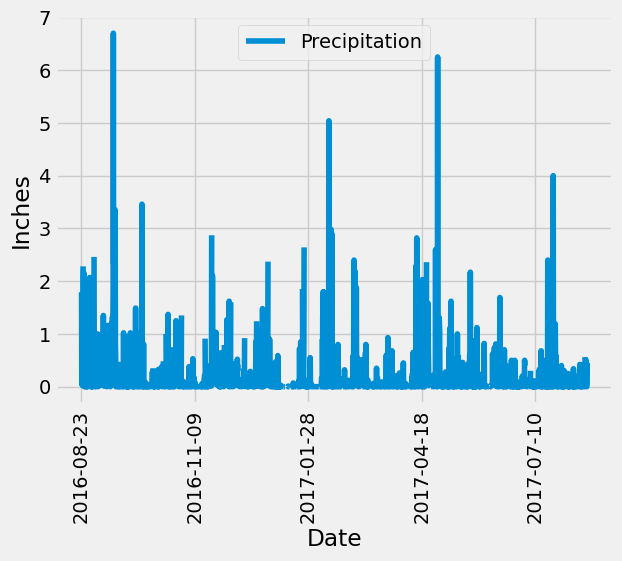

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns =['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x= 'Date', y= 'Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = session.query(func.count(Station.station)).all()
num_of_stations

[(9,)]

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(
    Measurement.station, func.count(Measurement.station)
).group_by(Measurement.station).order_by(
    func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(
    func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)
).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='temperature', ylabel='Frequency'>

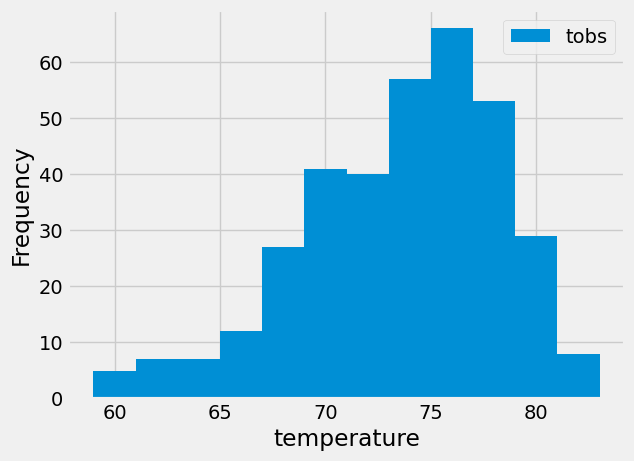

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_results=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= prev_year).all()
Temp_df=pd.DataFrame(Temp_results, columns=["tobs"])
Temp_df.plot(kind="hist",bins=12,xlabel="temperature")

# Close Session

In [34]:
# Close Session
session.close()